In [2]:
import pandas as pd

In [3]:
import warnings
warnings.simplefilter("ignore")

import konlpy
konlpy.__version__

'0.5.1'

In [4]:
from konlpy.tag import Okt
okt = Okt() # 객체 생성

In [5]:
from konlpy.tag import Twitter 
from collections import Counter

In [6]:
#final = pd.read_csv('./title_전처리.csv', names =['f_title'])
final = pd.read_csv('../data/real_final.csv')

In [7]:
final.columns

Index(['year', 'month', 'week', 'rank', 'song_id', 'title', 'like', 'reply',
       'genre', 'artist_id', 'artist', 'fan', 'album_id', 'album',
       'album_release_date', 'album_reply', 'album_score', 'album_score_count',
       '키즈', 'POP', '국내뮤지컬', '국외영화', '발라드', '크로스오버', 'EDM', '랩/힙합', '국내영화',
       '애시드/퓨전/팝', '댄스', 'JPOP', '인디음악', '일렉트로니카', '성인가요', 'R&B/Soul', '재즈',
       '록/메탈', '클래식', '애니메이션/웹툰', '만화', '게임', '뉴에이지', '국내드라마', '포크/블루스'],
      dtype='object')

In [8]:
final.shape

(51292, 43)

# feat 빼주기

In [19]:
title = final['title'].apply(lambda x: x.split('(Feat.')[0].split('(feat.')[0].split('(Prod.')[0].split('(prod.')[0].split('(With')[0].split('(Sung')[0].split('(Clean')[0].split('(Original')[0].split('(Korean')[0].split('(BigRoom')[0].split('(Main')[0].split('(Retro')[0].split('(New')[0].split('(Sincere')[0].split('(PROD')[0].split('(Steve')[0].split('(Intro.')[0].split('(Rock')[0].split('(JTBC')[0].split('(MINO')[0].split('(답가')[0].split('(2011')[0].split('(Part')[0].split('(삼성')[0].split('(Full')[0].split('(Song')[0].split('(2019')[0].split('feat')[0].split('(Hidden')[0].split('(Duet')[0].split('(BTS')[0].split('(X1')[0].split('(Narr')[0].split('(피쳐링')[0].split('(화생방실')[0])
df = pd.DataFrame(columns = ('title', 'genre'))
df['title'] = title
df['genre'] = final['genre']

In [20]:
title.shape

(51292,)

In [21]:
df

,title,genre
0,우리 사랑하게 됐어요.,['댄스']
1,너 때문에,['댄스']
2,Bo Peep Bo Peep,['댄스']
3,오늘 헤어졌어요,['발라드']
4,처음처럼 그때처럼,['발라드']
...,...,...
51287,달,['발라드']
51288,FLASH,['댄스']
51289,Here I Am,['발라드']
51290,Another Day,"['발라드', '국내드라마']"


In [22]:
df.to_csv('순위중복허용_전처리완료.csv', index = False)

In [23]:
df2 = df['title']

In [24]:
df2.to_csv('순위중복허용_전처리완료.txt', index = False)

# 제목은 unique하게 한번만 나오게

In [25]:
df = df.reset_index()

In [26]:
df_dup = df.drop_duplicates(subset='title', keep='first')

In [27]:
df_dup = df_dup.drop(columns='index')

In [28]:
df_dup

,title,genre
0,우리 사랑하게 됐어요.,['댄스']
1,너 때문에,['댄스']
2,Bo Peep Bo Peep,['댄스']
3,오늘 헤어졌어요,['발라드']
4,처음처럼 그때처럼,['발라드']
...,...,...
51255,을,['랩/힙합']
51270,낙서,['랩/힙합']
51273,이혼서류,['랩/힙합']
51280,운명이 내게 말해요,"['R&B/Soul', '국내드라마']"


In [29]:
df_dup.to_csv('중복제거_전처리완료.csv', index = False)

In [30]:
df_dup2 = df_dup['title']

In [31]:
df_dup2.to_csv('중복제거_전처리완료.txt', index = False)

# 텍스트 파일 불러오기

In [32]:
file = open('./data/중복허용_전처리완료.txt', 'r') 
lists = file.readlines() 
file.close() 
lists

['우리 사랑하게 됐어요.\n',
 '너 때문에\n',
 'Bo Peep Bo Peep\n',
 '오늘 헤어졌어요\n',
 '처음처럼 그때처럼 \n',
 '술 한잔 해요\n',
 'Heartbeat\n',
 '처음처럼\n',
 'Please Don`t Go\n',
 '싸이렌 (Siren) \n',
 'Change \n',
 'YOU AND I\n',
 '그녀처럼\n',
 'No Love No More\n',
 '만만하니\n',
 '사랑 참...\n',
 'Sign\n',
 'Mystery\n',
 'Love Story\n',
 '사랑하면 안되나요\n',
 '잊지 말아요\n',
 '눈 내리는 마을\n',
 '넌 나를 왜 \n',
 '그대라서\n',
 '사랑합니다\n',
 '그 놈 목소리\n',
 '기다리다 지친다\n',
 '마쉬멜로우\n',
 '못된 여자 II \n',
 'Chu~♡\n',
 '꿈을 꾸다 \n',
 '그립고 그립고 그립다\n',
 'Ghost (고스트)\n',
 'JoJo\n',
 '마법의 성\n',
 '내 여자 \n',
 '사랑경보 \n',
 '부른다\n',
 'Ring Ding Dong\n',
 '돌아올순 없나요\n',
 '어젠 \n',
 '사랑눈 \n',
 'My Color\n',
 '"헤어지지 못하는 여자, 떠나가지 못하는 남자 "\n',
 '여자는 나쁜남자를 좋아한다\n',
 'Gossip Girl\n',
 '실화\n',
 '눈물아 안녕\n',
 'Love Like This (네게로)\n',
 '웨딩드레스 (Wedding Dress)\n',
 '사랑비\n',
 '축가 (祝歌)\n',
 'Bad Girl\n',
 '원더우먼\n',
 '로맨틱 겨울 \n',
 '160 \n',
 'Touch Me\n',
 'Chocolate Love \n',
 '낙인\n',
 '사랑한 후에\n',
 'TTL (Time To Love)\n',
 '할렐루야\n',
 '죽일 놈 (Guilty)\n',
 '너에게 미쳤었다\n',
 'Crazy (영화 `주유소 습격사

# 형태소 나누기

In [33]:
twitter = Twitter()
morphs = [] 
for sentence in lists: 
    morphs.append(twitter.pos(sentence)) 

# 명사, 형용사, 부사만 골라내기

In [34]:
noun_adj_adv_list=[] 
for sentence in morphs : 
    for word, tag in sentence : 
        if tag in ['Noun'] and ("것" not in word) and ("내" not in word)and ("나" not in word)and ("수"not in word) and("게"not in word)and("말"not in word): 
            noun_adj_adv_list.append(word) 
            
print(noun_adj_adv_list)


['우리', '사랑', '너', '때문', '오늘', '처음처럼', '그때', '술', '한잔', '해', '처음처럼', '싸이렌', '그녀', '사랑', '사랑', '눈', '마을', '넌', '왜', '그대', '사랑', '그', '놈', '목소리', '마쉬멜로우', '여자', '꿈', '고스트', '마법', '성', '여자', '사랑', '경보', '순', '어젠', '사랑', '눈', '여자', '남자', '여자', '실화', '눈물', '안녕', '웨딩드레스', '사랑비', '축가', '원더우먼', '로맨틱', '겨울', '낙인', '사랑', '후', '할렐루야', '놈', '너', '영화', '주유소', '습격', '사건', '삽입곡', '하모니', '사랑', '안', '최면', '한번', '이별', '사랑', '뒤', '비담', '이야기', '너', '약속', '가지', '코끝', '안', '채운', '사람', '너', '사랑', '둘이서', '우리', '지금', '너', '사랑', '사랑', '생각', '심장', '그대', '사랑', '징글징글', '사랑', '인걸', '아이', '우리', '사랑', '너', '때문', '오늘', '처음처럼', '그때', '원더우먼', '처음처럼', '술', '한잔', '해', '싸이렌', '낙인', '사랑', '그대', '그녀', '넌', '왜', '사랑', '안', '사랑', '사랑', '그', '놈', '목소리', '마쉬멜로우', '눈', '마을', '사랑', '여자', '첫사랑', '고스트', '꿈', '사랑', '경보', '마법', '성', '여자', '순', '여자', '여자', '남자', '사랑', '눈', '어젠', '한번', '희재', '실화', '눈물', '안녕', '주지', '마', '웨딩드레스', '지기', '로맨틱', '겨울', '축가', '사랑비', '자기', '하모니', '사랑', '사랑', '사랑', '둘이서', '놈', '그대', '외톨이야', '별', '사랑', '후', '너', 

# 빈도수대로 정렬하기

In [35]:
count = Counter(noun_adj_adv_list)

In [41]:
words = dict(count.most_common())

In [42]:
words

{'사랑': 2908,
 '너': 1958,
 '밤': 760,
 '그대': 700,
 '사람': 509,
 '우리': 500,
 '그': 494,
 '날': 474,
 '이별': 448,
 '이': 442,
 '눈': 349,
 '오늘': 345,
 '노래': 319,
 '시간': 296,
 '눈물': 289,
 '별': 282,
 '봄': 274,
 '니': 272,
 '해': 258,
 '남자': 249,
 '다시': 247,
 '여자': 244,
 '비': 239,
 '널': 231,
 '그때': 223,
 '못': 222,
 '모든': 216,
 '또': 212,
 '끝': 206,
 '안녕': 204,
 '가슴': 203,
 '벚꽃': 195,
 '바람': 187,
 '엔딩': 184,
 '봄날': 181,
 '하루': 174,
 '고백': 174,
 '꽃': 172,
 '편지': 170,
 '가을': 169,
 '길': 168,
 '술': 154,
 '바보': 150,
 '왜': 148,
 '뭐': 148,
 '곡': 143,
 '어디': 142,
 '더': 138,
 '연애': 138,
 '줄': 135,
 '순간': 135,
 '속': 132,
 '꿈': 128,
 '하늘': 127,
 '걸': 127,
 '썸': 127,
 '넌': 125,
 '마음': 125,
 '마지막': 124,
 '처음': 123,
 '놈': 120,
 '달라': 119,
 '기억': 115,
 '중': 109,
 '선물': 108,
 '크리스마스': 108,
 '집': 108,
 '금요일': 108,
 '위해': 107,
 '여름밤': 106,
 '야생화': 106,
 '일': 105,
 '안부': 103,
 '이유': 102,
 '살': 101,
 '당신': 101,
 '그날': 101,
 '뚜': 100,
 '한번': 98,
 '혼자': 97,
 '겨울': 96,
 '이야기': 95,
 '네': 95,
 '마': 93,
 '생각': 92,
 '매일': 92,
 '

# 사랑,사람,너 제거 

In [43]:
del words['사랑']
del words['사람']
del words['너']

In [44]:
words

{'밤': 760,
 '그대': 700,
 '우리': 500,
 '그': 494,
 '날': 474,
 '이별': 448,
 '이': 442,
 '눈': 349,
 '오늘': 345,
 '노래': 319,
 '시간': 296,
 '눈물': 289,
 '별': 282,
 '봄': 274,
 '니': 272,
 '해': 258,
 '남자': 249,
 '다시': 247,
 '여자': 244,
 '비': 239,
 '널': 231,
 '그때': 223,
 '못': 222,
 '모든': 216,
 '또': 212,
 '끝': 206,
 '안녕': 204,
 '가슴': 203,
 '벚꽃': 195,
 '바람': 187,
 '엔딩': 184,
 '봄날': 181,
 '하루': 174,
 '고백': 174,
 '꽃': 172,
 '편지': 170,
 '가을': 169,
 '길': 168,
 '술': 154,
 '바보': 150,
 '왜': 148,
 '뭐': 148,
 '곡': 143,
 '어디': 142,
 '더': 138,
 '연애': 138,
 '줄': 135,
 '순간': 135,
 '속': 132,
 '꿈': 128,
 '하늘': 127,
 '걸': 127,
 '썸': 127,
 '넌': 125,
 '마음': 125,
 '마지막': 124,
 '처음': 123,
 '놈': 120,
 '달라': 119,
 '기억': 115,
 '중': 109,
 '선물': 108,
 '크리스마스': 108,
 '집': 108,
 '금요일': 108,
 '위해': 107,
 '여름밤': 106,
 '야생화': 106,
 '일': 105,
 '안부': 103,
 '이유': 102,
 '살': 101,
 '당신': 101,
 '그날': 101,
 '뚜': 100,
 '한번': 98,
 '혼자': 97,
 '겨울': 96,
 '이야기': 95,
 '네': 95,
 '마': 93,
 '생각': 92,
 '매일': 92,
 '한잔': 91,
 '여름': 90,
 '안': 89,
 '오빠': 

# 워드 클라우드 만들기

In [45]:
from wordcloud import WordCloud 
import matplotlib.pyplot as plt

import nltk 
from nltk.corpus import stopwords

In [46]:
%matplotlib inline 
import matplotlib
from IPython.display import set_matplotlib_formats 
matplotlib.rc('font',family = 'Malgun Gothic') 

set_matplotlib_formats('retina') 
matplotlib.rc('axes',unicode_minus = False)


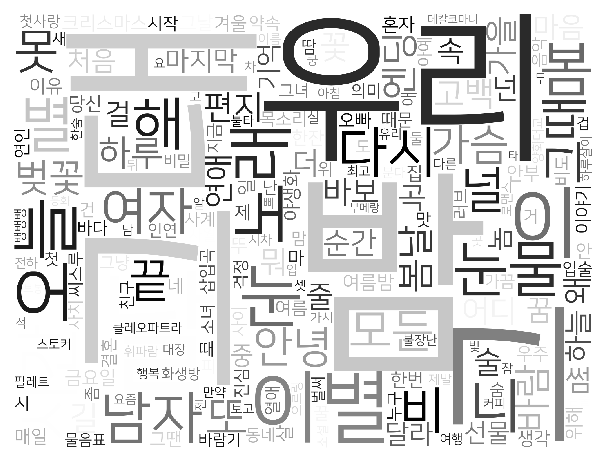

In [47]:
wordcloud = WordCloud(font_path = '/Users/yaein/Library/Fonts/NanumSquareOTFRegular.otf', background_color='white',colormap = "binary", width=2000, height=1500).generate_from_frequencies(words) 

plt.imshow(wordcloud) 
plt.axis('off') 
plt.show()

# 이미지를 입혀보아요

In [59]:
from PIL import Image
import numpy as np

In [60]:
alice_mask = np.array(Image.open("./alice_mask.png"))

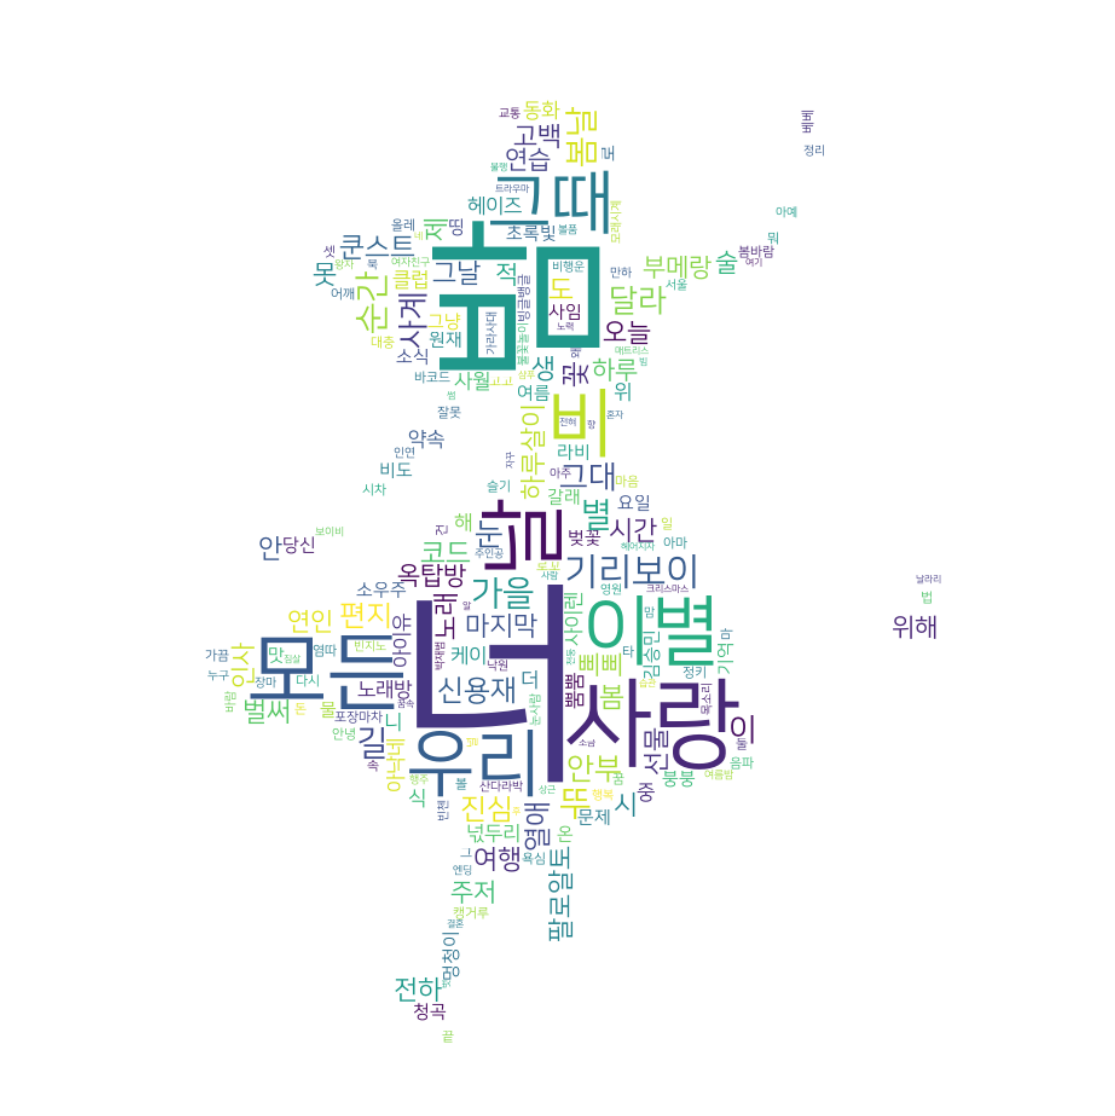

In [62]:
wordcloud = WordCloud(
    font_path = '/Users/yaein/Library/Fonts/NanumSquareOTFRegular.otf',             
    width = 800,
    height = 800,
    background_color="white",
    mask = alice_mask
).generate_from_frequencies(words) 

plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()